In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv("Data.csv")
state_data= pd.read_csv("State_data.csv")
ncap_funding= pd.read_csv("NCAP_Funding.csv")

State with the highest average PM2.5 concentration: Bihar (112.43 µg/m³)


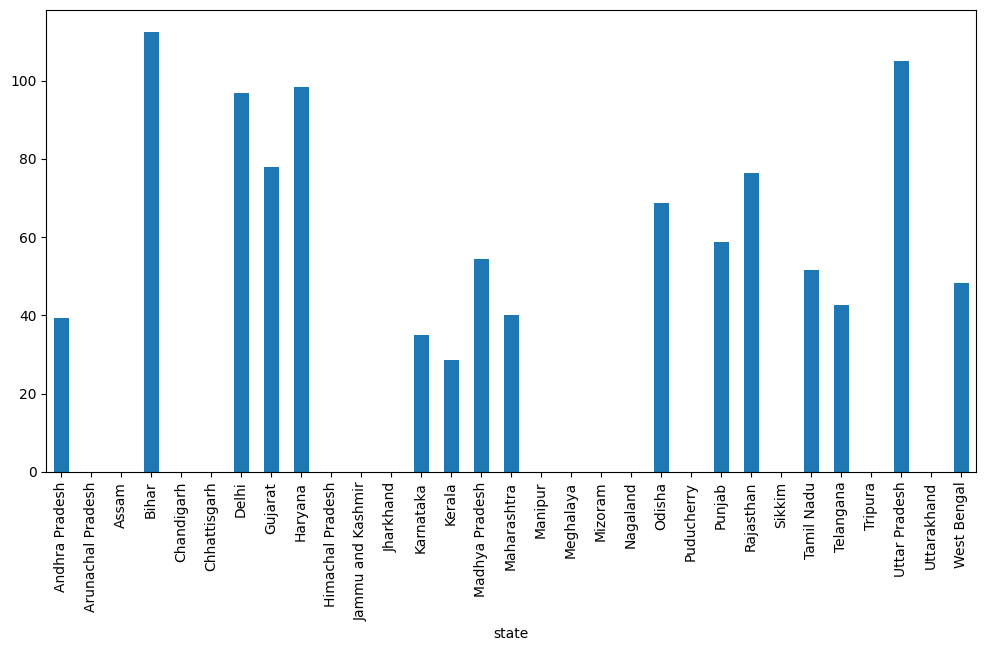

In [4]:
#1.1
avg_pm25_state = data.groupby('state')['PM2.5'].mean()
avg_pm25_state.plot(kind='bar', figsize=(12, 6))
average_pm25_by_state = data.groupby('state')['PM2.5'].mean().sort_values(ascending=False)
highest_avg_pm25_state = average_pm25_by_state.idxmax()
highest_avg_pm25_value = average_pm25_by_state.max()

print(f"State with the highest average PM2.5 concentration: {highest_avg_pm25_state} ({highest_avg_pm25_value:.2f} µg/m³)")

State with the most hazardous days in 2023: Delhi (470 days)


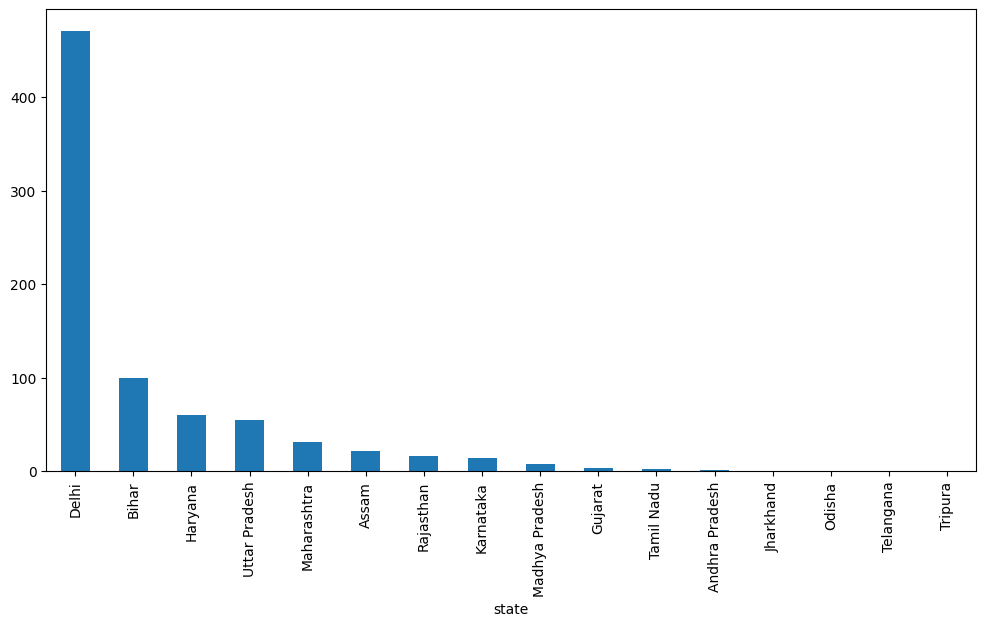

In [13]:
#1.2
data['Timestamp'] = pd.to_datetime(data['Timestamp'], errors='coerce')
data['Year'] = data['Timestamp'].dt.year
data['Month'] = data['Timestamp'].dt.month

hazardous_2023 = data[(data['Year'] == 2023) & (data['PM2.5'] > 300)]
hazardous_days_by_state = hazardous_2023.groupby('state').size().sort_values(ascending=False)
most_hazardous_state = hazardous_days_by_state.idxmax()
most_hazardous_days = hazardous_days_by_state.max()
hazardous_days_by_state.plot(kind='bar', figsize=(12, 6))

print(f"State with the most hazardous days in 2023: {most_hazardous_state} ({most_hazardous_days} days)")


State with the highest variability in PM2.5 levels in 2023: Delhi (82.80)


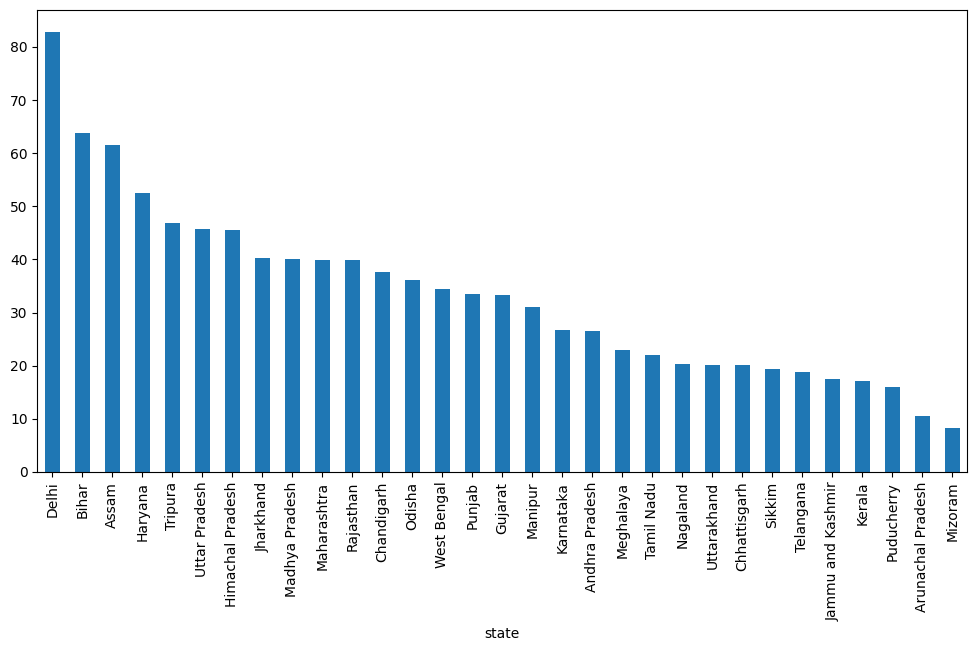

In [14]:
#1.3
data = pd.read_csv("Data.csv")
data['Timestamp'] = pd.to_datetime(data['Timestamp'], errors='coerce')
data['Year'] = data['Timestamp'].dt.year
data['Month'] = data['Timestamp'].dt.month
pm25_2023 = data[data['Year'] == 2023]

variability_by_state = pm25_2023.groupby('state')['PM2.5'].std().sort_values(ascending=False)
highest_variability_state = variability_by_state.idxmax()
highest_variability_value = variability_by_state.max()
variability_by_state.plot(kind='bar', figsize=(12, 6))

print(f"State with the highest variability in PM2.5 levels in 2023: {highest_variability_state} ({highest_variability_value:.2f})")

State with the lowest average PM2.5 levels during the Covid period in 2020-21: Mizoram (13.42)


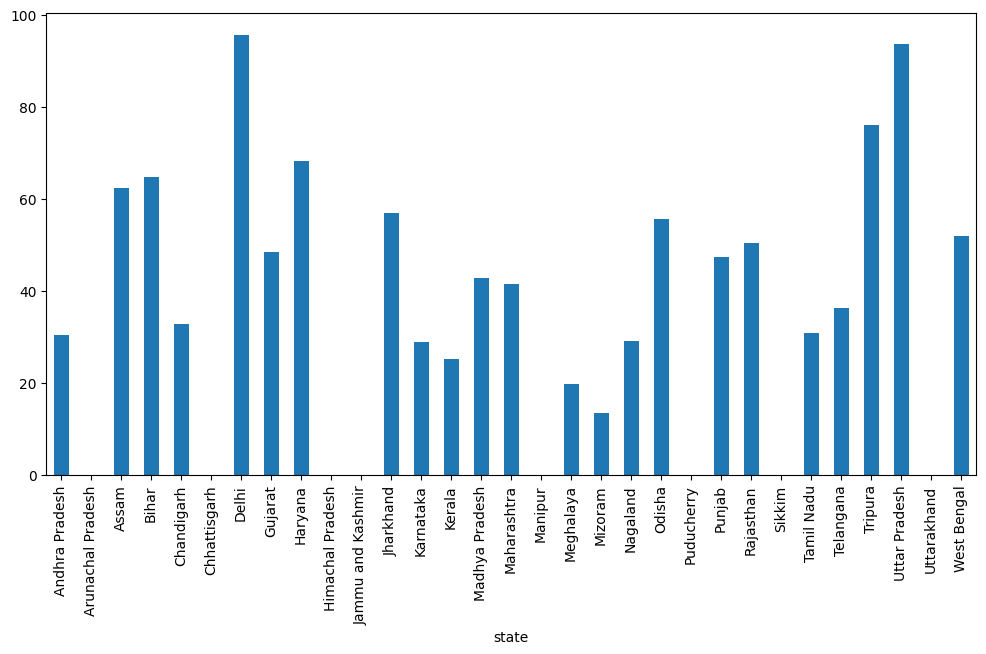

In [15]:
#1.4

data['Timestamp'] = pd.to_datetime(data['Timestamp'], errors='coerce')
data['Year'] = data['Timestamp'].dt.year
data['Month'] = data['Timestamp'].dt.month
data_covid_period = data[data['Year'] == 2020 & 2021]

avg_pm25_covid = data_covid_period.groupby('state')['PM2.5'].mean()
lowest_avg_pm25_covid_state = avg_pm25_covid.idxmin()
avg_pm25_covid.plot(kind='bar', figsize=(12, 6))

print(f"State with the lowest average PM2.5 levels during the Covid period in 2020-21: {lowest_avg_pm25_covid_state} ({avg_pm25_covid.min():.2f})")


In [16]:
#2.1

data['Timestamp'] = pd.to_datetime(data['Timestamp'], errors='coerce')
data['Year'] = data['Timestamp'].dt.year
data['Month'] = data['Timestamp'].dt.month
aug_2020_data = data[(data['Year'] == 2020) & (data['Month'] == 8)]

max_pm25_aug_2020 = aug_2020_data.loc[aug_2020_data['PM2.5'].idxmax()]

max_station_aug_2020 = max_pm25_aug_2020['station']
max_pm25_value = max_pm25_aug_2020['PM2.5']

print(f"Station with the highest value of PM2.5 levels for the month of August 2020.: {max_station_aug_2020} ({max_pm25_value:.2f})")


Station with the highest value of PM2.5 levels for the month of August 2020.: Lal Bahadur Shastri Nagar, Kalaburagi - KSPCB (805.51)


Average PM2.5 concentration in 2018:
season
Monsoon    42.887399
Winter     67.492344
Name: PM2.5, dtype: float64
Season with the highest average PM2.5 concentration: Winter (67.49)
In winter we generally see increase in pollution due to Temperature inversions, more burning of fossil fuels whereas in monsoon season due to rain clears the pollutants.


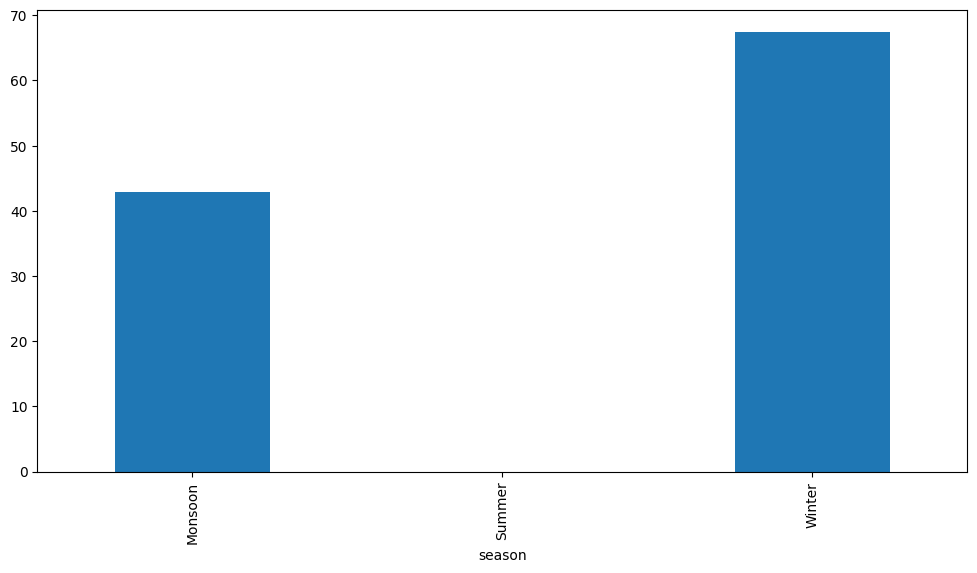

In [17]:
#2.2
import pandas as pd



data['Timestamp'] = pd.to_datetime(data['Timestamp'], errors='coerce')
data['Year'] = data['Timestamp'].dt.year
data['Month'] = data['Timestamp'].dt.month
data_2018 = data[(data['Year'] == 2018) & (data['station'] == 'Lal Bahadur Shastri Nagar, Kalaburagi - KSPCB')].copy()
def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Summer'
    else:
        return 'Monsoon'

data_2018.loc[:, 'season'] = data_2018['Month'].apply(get_season)
season_avg_pm25 = data_2018.groupby('season')['PM2.5'].mean()
drop = season_avg_pm25.dropna()
season_avg_pm25.plot(kind='bar', figsize=(12, 6))
highest_pollution_season = season_avg_pm25.idxmax()
highest_pollution_value = season_avg_pm25.max()

season_avg_pm25, highest_pollution_season, highest_pollution_value
print("Average PM2.5 concentration in 2018:")
print(drop)
print(f"Season with the highest average PM2.5 concentration: {highest_pollution_season} ({highest_pollution_value:.2f})")
print("In winter we generally see increase in pollution due to Temperature inversions, more burning of fossil fuels whereas in monsoon season due to rain clears the pollutants.")


<Figure size 1000x600 with 0 Axes>

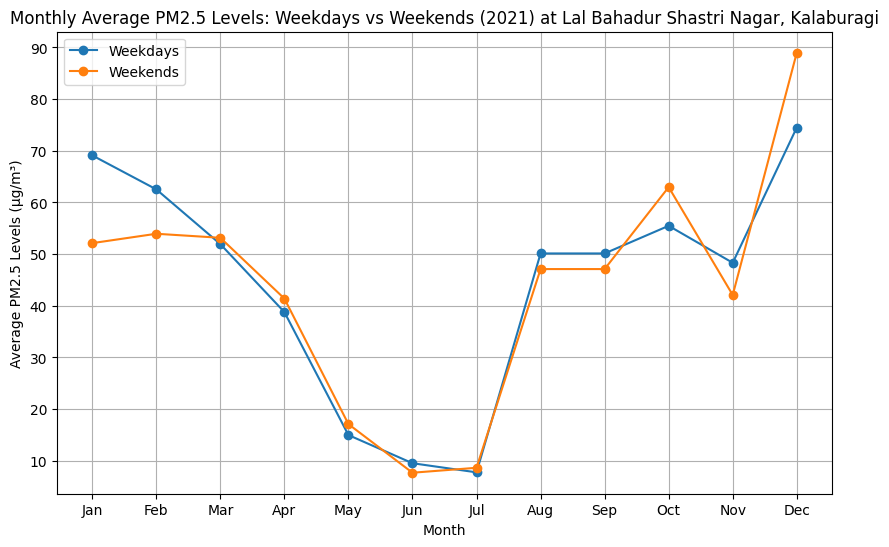

In [18]:
#2.3
import pandas as pd
import matplotlib.pyplot as plt


data['Timestamp'] = pd.to_datetime(data['Timestamp'], errors='coerce')
data['Year'] = data['Timestamp'].dt.year
data['Month'] = data['Timestamp'].dt.month

station = 'Lal Bahadur Shastri Nagar, Kalaburagi - KSPCB'
data_2021 = data[(data['Year'] == 2021) & (data['station'] == station)].copy()
data_2021['is_weekend'] = data_2021['Timestamp'].dt.weekday >= 5
monthly_avg_pm25 = data_2021.groupby([data_2021['Month'], 'is_weekend'])['PM2.5'].mean().unstack()
monthly_avg_pm25 = monthly_avg_pm25.apply(lambda x: x.fillna(x.median()), axis=0)

plt.figure(figsize=(10, 6))
monthly_avg_pm25.plot(kind='line', figsize=(10, 6), marker='o')
plt.title('Monthly Average PM2.5 Levels: Weekdays vs Weekends (2021) at Lal Bahadur Shastri Nagar, Kalaburagi')
plt.xlabel('Month')
plt.ylabel('Average PM2.5 Levels (µg/m³)')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.legend(['Weekdays', 'Weekends'])
plt.grid(True)
plt.show()

In [19]:
#3.1
import pandas as pd



data['Timestamp'] = pd.to_datetime(data['Timestamp'], errors='coerce')
data['Year'] = data['Timestamp'].dt.year
data['Month'] = data['Timestamp'].dt.month
data_2022 = data[data['Year'] == 2022]


monsoon_months = [6, 7, 8, 9]
summer_months = [3, 4, 5]
monsoon_data = data_2022[data_2022['Month'].isin(monsoon_months)]
summer_data = data_2022[data_2022['Month'].isin(summer_months)]
monsoon_avg_pm25 = monsoon_data.groupby('state')['PM2.5'].mean()
summer_avg_pm25 = summer_data.groupby('state')['PM2.5'].mean()


pm25_comparison = pd.DataFrame({
    'Monsoon_Avg_PM2.5': monsoon_avg_pm25,
    'Summer_Avg_PM2.5': summer_avg_pm25
})
pm25_comparison['Percentage_Change'] = ((pm25_comparison['Monsoon_Avg_PM2.5'] - pm25_comparison['Summer_Avg_PM2.5'])
                                         / pm25_comparison['Summer_Avg_PM2.5']) * 100
pm25_comparison['Abs_Percentage_Change'] = pm25_comparison['Percentage_Change'].abs()
state_with_max_change = pm25_comparison['Abs_Percentage_Change'].idxmax()
result = pm25_comparison.loc[state_with_max_change]
print(f"State with the highest change in PM2.5 levels (2022): {state_with_max_change}")
print(f"Monsoon Avg PM2.5: {result['Monsoon_Avg_PM2.5']}, Summer Avg PM2.5: {result['Summer_Avg_PM2.5']}")
print(f"Percentage Change: {result['Percentage_Change']}%")


State with the highest change in PM2.5 levels (2022): Assam
Monsoon Avg PM2.5: 21.872292410416943, Summer Avg PM2.5: 56.33764736934657
Percentage Change: -61.17641855538734%


In [20]:
#3.2
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv(r"C:\Users\achai\Downloads\Data.csv")

df['Timestamp'] = pd.to_datetime(df['Timestamp'], errors='coerce')
df_delhi = df[df['city'] == 'Delhi'].copy()
df_delhi['Year'] = df_delhi['Timestamp'].dt.year
df_delhi['Month'] = df_delhi['Timestamp'].dt.month
def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Summer'
    else:
        return 'Monsoon'

df_delhi['Season'] = df_delhi['Month'].apply(get_season)
df_delhi = df_delhi[(df_delhi['Year'] >= 2017) & (df_delhi['Year'] <= 2023)]
seasonal_avg = df_delhi.groupby(['Year', 'Season'])['PM2.5'].mean().unstack()

plt.figure(figsize=(10, 5))
seasonal_avg.plot(kind='line', marker='o', linewidth=2, figsize=(12, 6))
plt.title('Seasonal Variation of PM2.5 Levels in Delhi (2017-2023)')
plt.xlabel('Year')
plt.ylabel('Average PM2.5 Level')
plt.legend(title='Season')
plt.grid(True)
plt.show()

print("In winter it has highest PM values mainly due to its temparature inversion low speed winds and increased pollution")
print("Moderate levels due to high temparatures")
print("lowest, as rainfall is helping in particulate matter settling")

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\achai\\Downloads\\Data.csv'

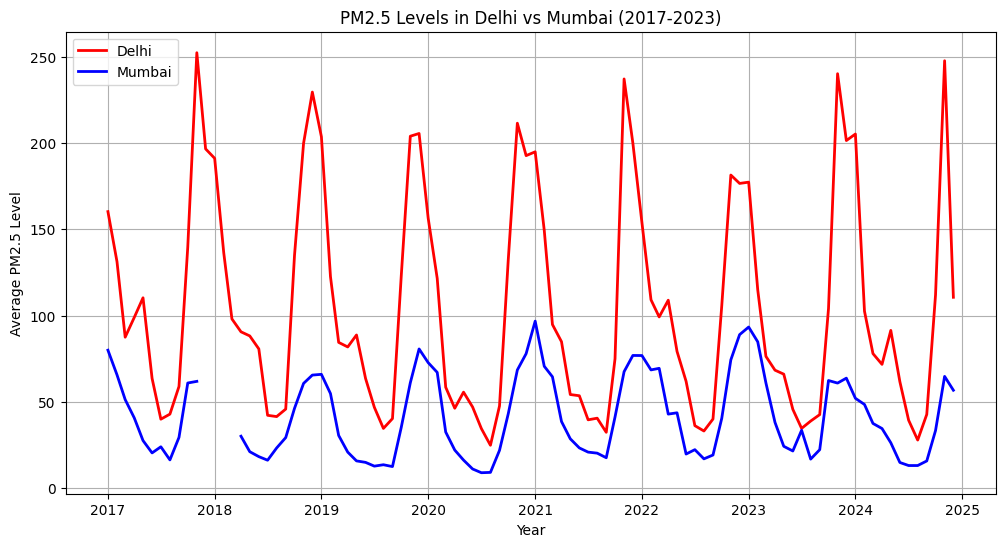

Delhi's PM2.5 standard deviation: 84.55
Mumbai's PM2.5 standard deviation: 37.74
What we think is, Fluctuations mean variability,a city with more extreme rises and drops in PM2.5 levels has higher fluctuations.
That is more the variability is more the standard deviation and more the fluctuations
Delhi had more fluctuations in PM2.5 levels.


In [21]:
#3.3
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("Data.csv")

df['Timestamp'] = pd.to_datetime(df['Timestamp'], errors='coerce')
df_filtered = df[df['city'].isin(['Delhi', 'Mumbai'])].copy()
df_filtered['Year-Month'] = df_filtered['Timestamp'].dt.to_period('M')
city_pm25 = df_filtered.groupby(['Year-Month', 'city'])['PM2.5'].mean().unstack()
city_pm25.index = city_pm25.index.to_timestamp()


plt.figure(figsize=(12, 6))
plt.plot(city_pm25.index, city_pm25['Delhi'], label='Delhi', color='red', linewidth=2)
plt.plot(city_pm25.index, city_pm25['Mumbai'], label='Mumbai', color='blue', linewidth=2)
plt.title('PM2.5 Levels in Delhi vs Mumbai (2017-2023)')
plt.xlabel('Year')
plt.ylabel('Average PM2.5 Level')
plt.legend()
plt.grid(True)
plt.show()

delhi_std = df_filtered[df_filtered['city'] == 'Delhi']['PM2.5'].std()
mumbai_std = df_filtered[df_filtered['city'] == 'Mumbai']['PM2.5'].std()
print(f"Delhi's PM2.5 standard deviation: {delhi_std:.2f}")
print(f"Mumbai's PM2.5 standard deviation: {mumbai_std:.2f}")
print("What we think is, Fluctuations mean variability,a city with more extreme rises and drops in PM2.5 levels has higher fluctuations.")
print("That is more the variability is more the standard deviation and more the fluctuations")
if delhi_std > mumbai_std:
    print("Delhi had more fluctuations in PM2.5 levels.")
else:
    print("Mumbai had more fluctuations in PM2.5 levels.")

In [26]:
#4.1
import pandas as pd
import matplotlib.pyplot as plt



stations_per_state = air_quality_df.groupby('state')['station'].nunique()
state_data = stations_per_state.reset_index().merge(population_df, left_on='state', right_on='State')
state_data['stations_per_million'] = state_data['station'] / (state_data['Population'] / 1e6)
max_state = state_data.loc[state_data['stations_per_million'].idxmax()]
print(f"State with highest monitoring stations per million: {max_state['State']} ({max_state['stations_per_million']:.2f} stations per million)")

State with highest monitoring stations per million: Chandigarh (2.84 stations per million)


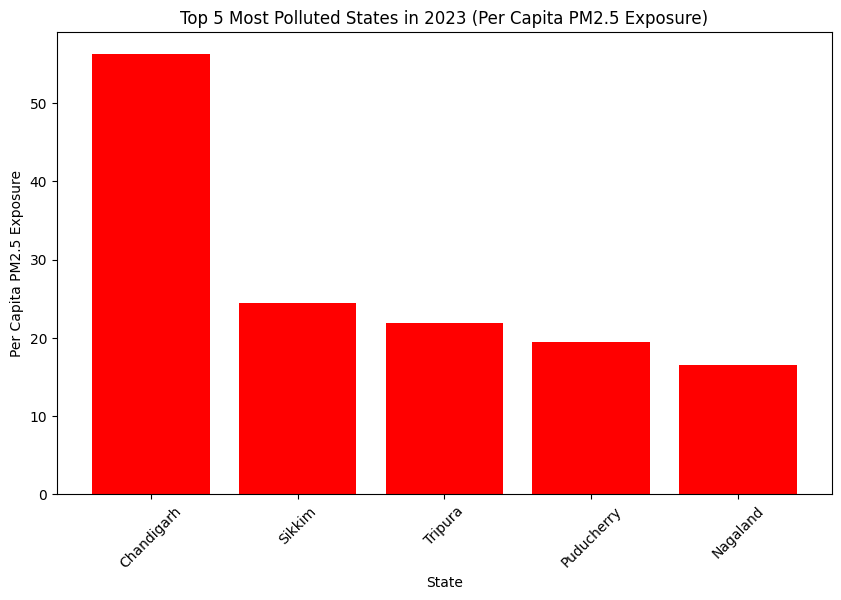

In [27]:
#4.2
import pandas as pd
import matplotlib.pyplot as plt

air_quality_df = pd.read_csv("Data.csv", parse_dates=['Timestamp'])
population_df = pd.read_csv("State_data.csv")

air_quality_df = air_quality_df[air_quality_df['Timestamp'].dt.year == 2023]
pm25_per_state = air_quality_df.groupby('state')['PM2.5'].mean()
state_data = pm25_per_state.reset_index().merge(population_df, left_on='state', right_on='State')
state_data['pm25_per_capita'] = state_data['PM2.5'] / (state_data['Population'] / 1e6)
top_5_states = state_data.nlargest(5, 'pm25_per_capita')

plt.figure(figsize=(10, 6))
plt.bar(top_5_states['State'], top_5_states['pm25_per_capita'], color='red')
plt.xlabel('State')
plt.ylabel('Per Capita PM2.5 Exposure')
plt.title('Top 5 Most Polluted States in 2023 (Per Capita PM2.5 Exposure)')
plt.xticks(rotation=45)
plt.show()

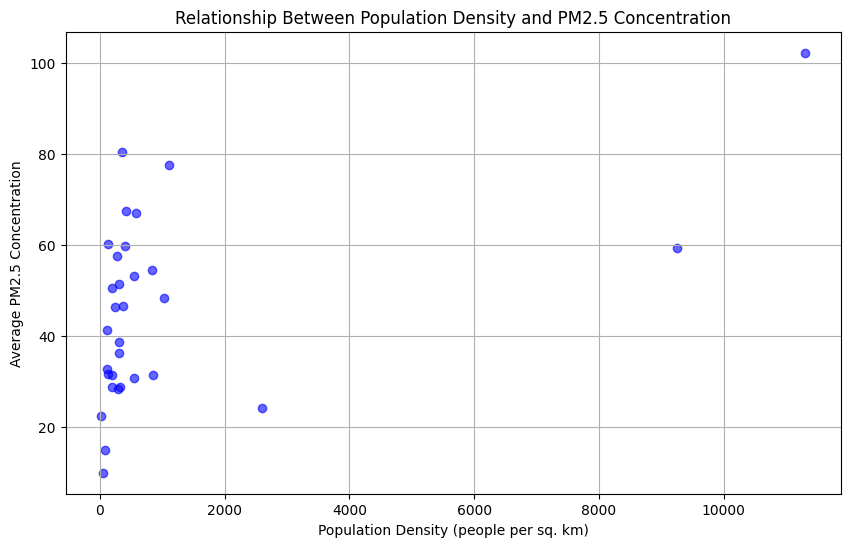

From this we came to know that population density doesn't clearly shows the population levels but at higher densities it is tending to give higher PM2.5 values


In [28]:
#4.3
import pandas as pd
import matplotlib.pyplot as plt


air_quality_df = air_quality_df[air_quality_df['Timestamp'].dt.year == 2023]

pm25_per_state = air_quality_df.groupby('state')['PM2.5'].mean()
state_data = pm25_per_state.reset_index().merge(population_df, left_on='state', right_on='State')
state_data['Population Density'] = state_data['Population'] / state_data['Area (km2)']

plt.figure(figsize=(10, 6))
plt.scatter(state_data['Population Density'], state_data['PM2.5'], color='blue', alpha=0.6)
plt.xlabel('Population Density (people per sq. km)')
plt.ylabel('Average PM2.5 Concentration')
plt.title('Relationship Between Population Density and PM2.5 Concentration')
plt.grid(True)
plt.show()
print("From this we came to know that population density doesn't clearly shows the population levels but at higher densities it is tending to give higher PM2.5 values")

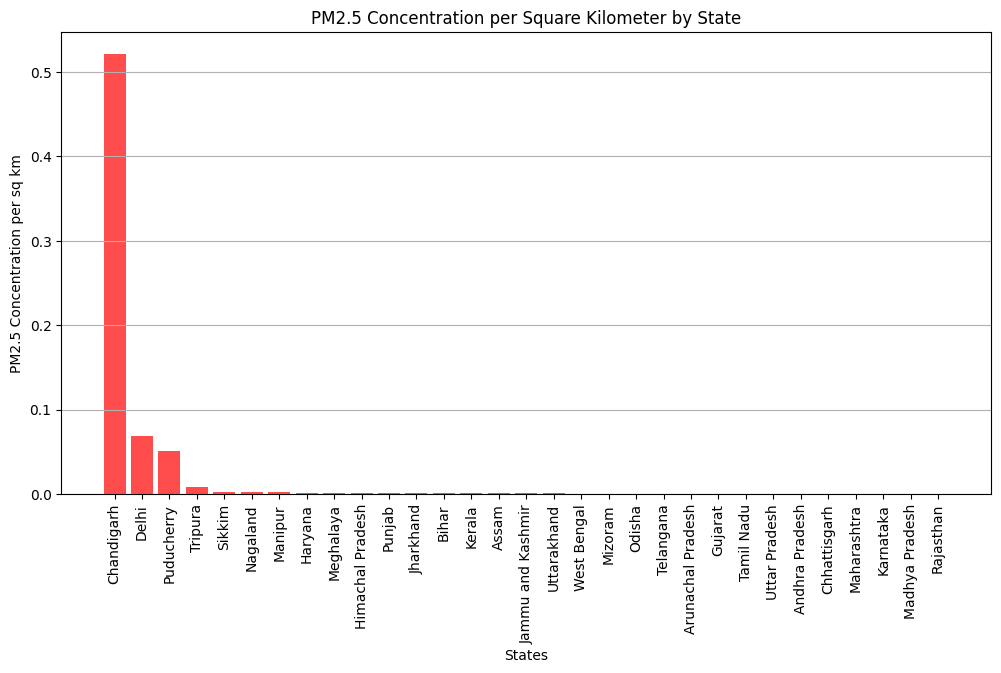

Chandigarh has the highest PM2.5 concentration per square kilometer


In [29]:
#5.1
import pandas as pd
import matplotlib.pyplot as plt


air_quality_df = air_quality_df[air_quality_df['Timestamp'].dt.year == 2023]
pm25_per_state = air_quality_df.groupby('state')['PM2.5'].mean()
state_data = pm25_per_state.reset_index().merge(population_df, left_on='state', right_on='State')
state_data['PM2.5 per sq km'] = state_data['PM2.5'] / state_data['Area (km2)']
top_polluted_states = state_data.sort_values(by='PM2.5 per sq km', ascending=False)

plt.figure(figsize=(12, 6))
plt.bar(top_polluted_states['State'], top_polluted_states['PM2.5 per sq km'], color='red', alpha=0.7)
plt.xlabel('States')
plt.ylabel('PM2.5 Concentration per sq km')
plt.title('PM2.5 Concentration per Square Kilometer by State')
plt.xticks(rotation=90)
plt.grid(axis='y')
plt.show()
print("Chandigarh has the highest PM2.5 concentration per square kilometer")

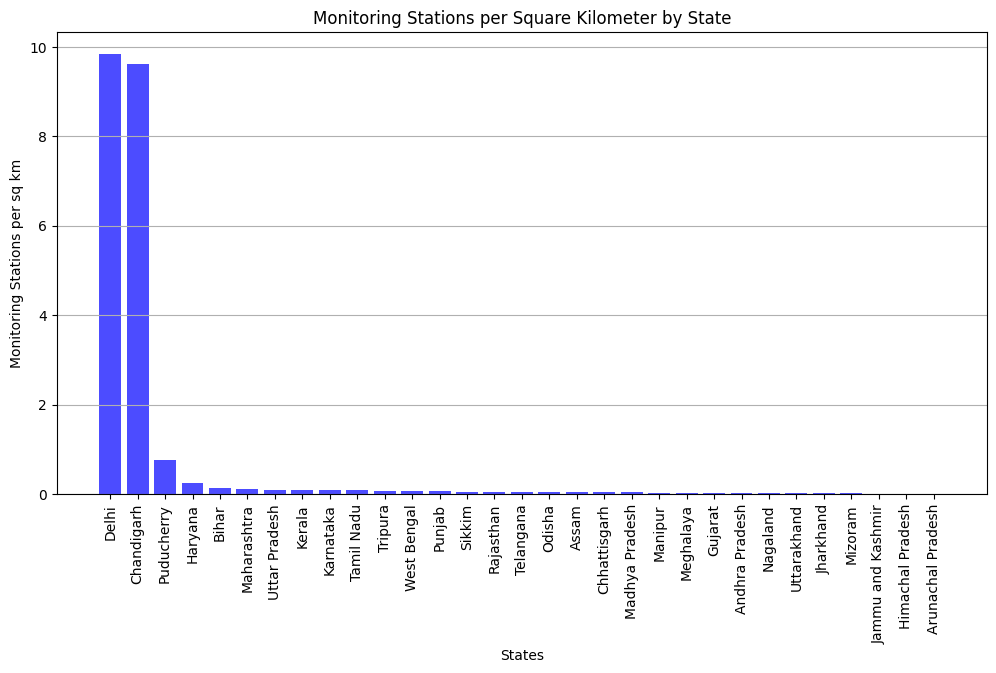

The state with the highest density of monitoring stations is Delhi.


In [30]:
#5.2
import pandas as pd
import matplotlib.pyplot as plt



stations_per_state = air_quality_df.groupby('state').size().reset_index(name='Number of Stations')
state_data = stations_per_state.merge(population_df, left_on='state', right_on='State')
state_data['Stations per sq km'] = state_data['Number of Stations'] / state_data['Area (km2)']
state_data_sorted = state_data.sort_values(by='Stations per sq km', ascending=False)
highest_density_state = state_data_sorted.iloc[0]['State']

plt.figure(figsize=(12, 6))
plt.bar(state_data_sorted['State'], state_data_sorted['Stations per sq km'], color='blue', alpha=0.7)
plt.xlabel('States')
plt.ylabel('Monitoring Stations per sq km')
plt.title('Monitoring Stations per Square Kilometer by State')
plt.xticks(rotation=90)
plt.grid(axis='y')
plt.show()

print(f"The state with the highest density of monitoring stations is {highest_density_state}.")

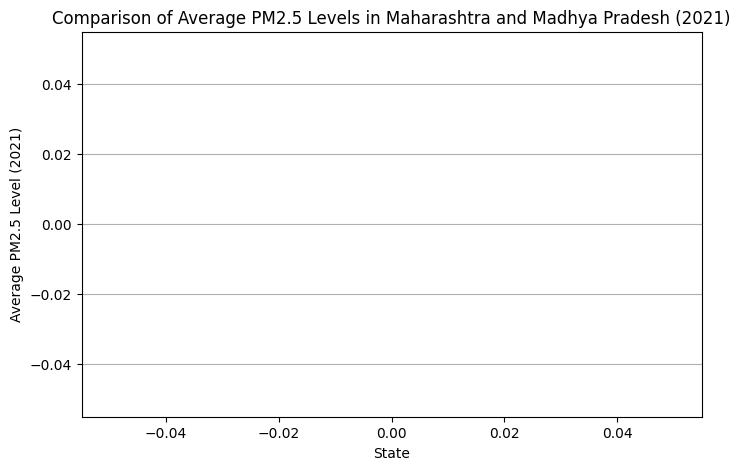

Empty DataFrame
Columns: [State, PM2.5, Population Density]
Index: []
population density alone doesn't correlates on PM2.5 levels.
Here even though Maharastra has a higher population density its PM2.5 values are comparable to Madhya Pradesh which has lower population density
Conditions like urbanization, Industrial activities, vehicle emissions also play a higher significant role on PM2.5 levels


In [31]:
#5.3
import pandas as pd
import matplotlib.pyplot as plt




air_quality_df = air_quality_df[air_quality_df['Timestamp'].dt.year == 2021]
states_of_interest = ['Maharashtra', 'Madhya Pradesh']
state_pm25 = air_quality_df[air_quality_df['state'].isin(states_of_interest)]
pm25_avg = state_pm25.groupby('state')['PM2.5'].mean().reset_index()
pm25_avg = pm25_avg.merge(population_df, left_on='state', right_on='State')
pm25_avg['Population Density'] = pm25_avg['Population'] / pm25_avg['Area (km2)']

plt.figure(figsize=(8, 5))
plt.bar(pm25_avg['State'], pm25_avg['PM2.5'], color=['red', 'green'], alpha=0.7)
plt.xlabel('State')
plt.ylabel('Average PM2.5 Level (2021)')
plt.title('Comparison of Average PM2.5 Levels in Maharashtra and Madhya Pradesh (2021)')
plt.grid(axis='y')
plt.show()

print(pm25_avg[['State', 'PM2.5', 'Population Density']])
print("population density alone doesn't correlates on PM2.5 levels.")
print("Here even though Maharastra has a higher population density its PM2.5 values are comparable to Madhya Pradesh which has lower population density")
print("Conditions like urbanization, Industrial activities, vehicle emissions also play a higher significant role on PM2.5 levels")

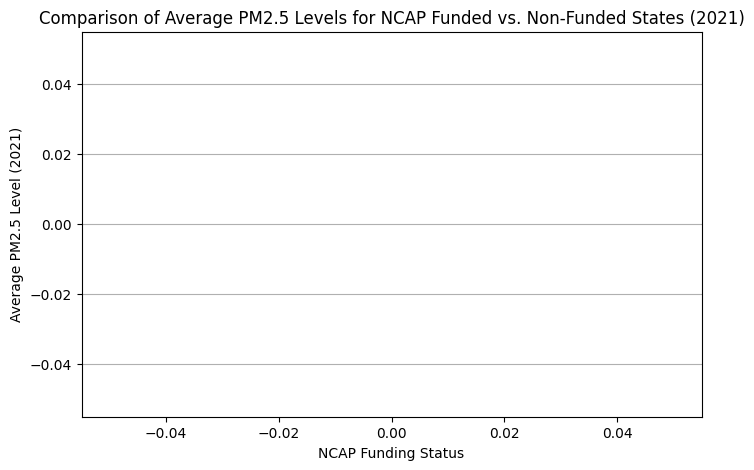

Empty DataFrame
Columns: [NCAP_Funded, PM2.5]
Index: []


In [33]:
#6.1
import pandas as pd
import matplotlib.pyplot as plt



ncap_funding_df = pd.read_csv("NCAP_Funding.csv")

air_quality_df = air_quality_df[air_quality_df['Timestamp'].dt.year == 2021]
ncap_states = ncap_funding_df['State'].unique()
air_quality_df['NCAP_Funded'] = air_quality_df['state'].apply(lambda x: 'Funded' if x in ncap_states else 'Not Funded')
pm25_avg = air_quality_df.groupby('NCAP_Funded')['PM2.5'].mean().reset_index()

plt.figure(figsize=(8, 5))
plt.bar(pm25_avg['NCAP_Funded'], pm25_avg['PM2.5'], color=['blue', 'orange'], alpha=0.7)
plt.xlabel('NCAP Funding Status')
plt.ylabel('Average PM2.5 Level (2021)')
plt.title('Comparison of Average PM2.5 Levels for NCAP Funded vs. Non-Funded States (2021)')
plt.grid(axis='y')
plt.show()

print(pm25_avg)

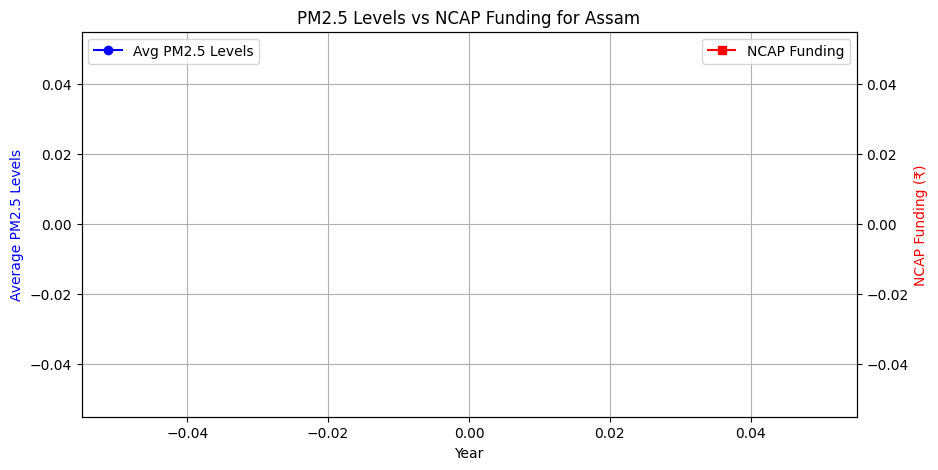

Empty DataFrame
Columns: [Year, PM2.5, State, Funding]
Index: []


"There's no immediate or noticeable improvement in air quality (reduction in PM2.5) with increased financing."

In [34]:
#6.2
import pandas as pd
import matplotlib.pyplot as plt


ncap_funding_df = pd.read_csv("NCAP_Funding.csv")

air_quality_df = air_quality_df[(air_quality_df['state'] == 'Assam')]
ncap_funding_df = ncap_funding_df[ncap_funding_df['State'] == 'Assam']
air_quality_df['Year'] = air_quality_df['Timestamp'].dt.year
pm25_avg = air_quality_df.groupby('Year')['PM2.5'].mean().reset_index()
funding_years = [col for col in ncap_funding_df.columns if 'FY' in col]
ncap_funding = pd.melt(ncap_funding_df, id_vars=['State'], value_vars=funding_years, var_name='Year', value_name='Funding')
ncap_funding['Year'] = ncap_funding['Year'].str.extract('(\\d{4})').astype(float)
ncap_funding = ncap_funding.dropna()
merged_df = pd.merge(pm25_avg, ncap_funding, on='Year', how='inner')

twin_fig, ax1 = plt.subplots(figsize=(10, 5))
ax2 = ax1.twinx()
ax1.plot(merged_df['Year'], merged_df['PM2.5'], 'b-o', label='Avg PM2.5 Levels')
ax2.plot(merged_df['Year'], merged_df['Funding'], 'r-s', label='NCAP Funding')
ax1.set_xlabel('Year')
ax1.set_ylabel('Average PM2.5 Levels', color='b')
ax2.set_ylabel('NCAP Funding (₹)', color='r')
ax1.set_title('PM2.5 Levels vs NCAP Funding for Assam')
ax1.grid()
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
plt.show()

print(merged_df)

'''There's no immediate or noticeable improvement in air quality (reduction in PM2.5) with increased financing.'''

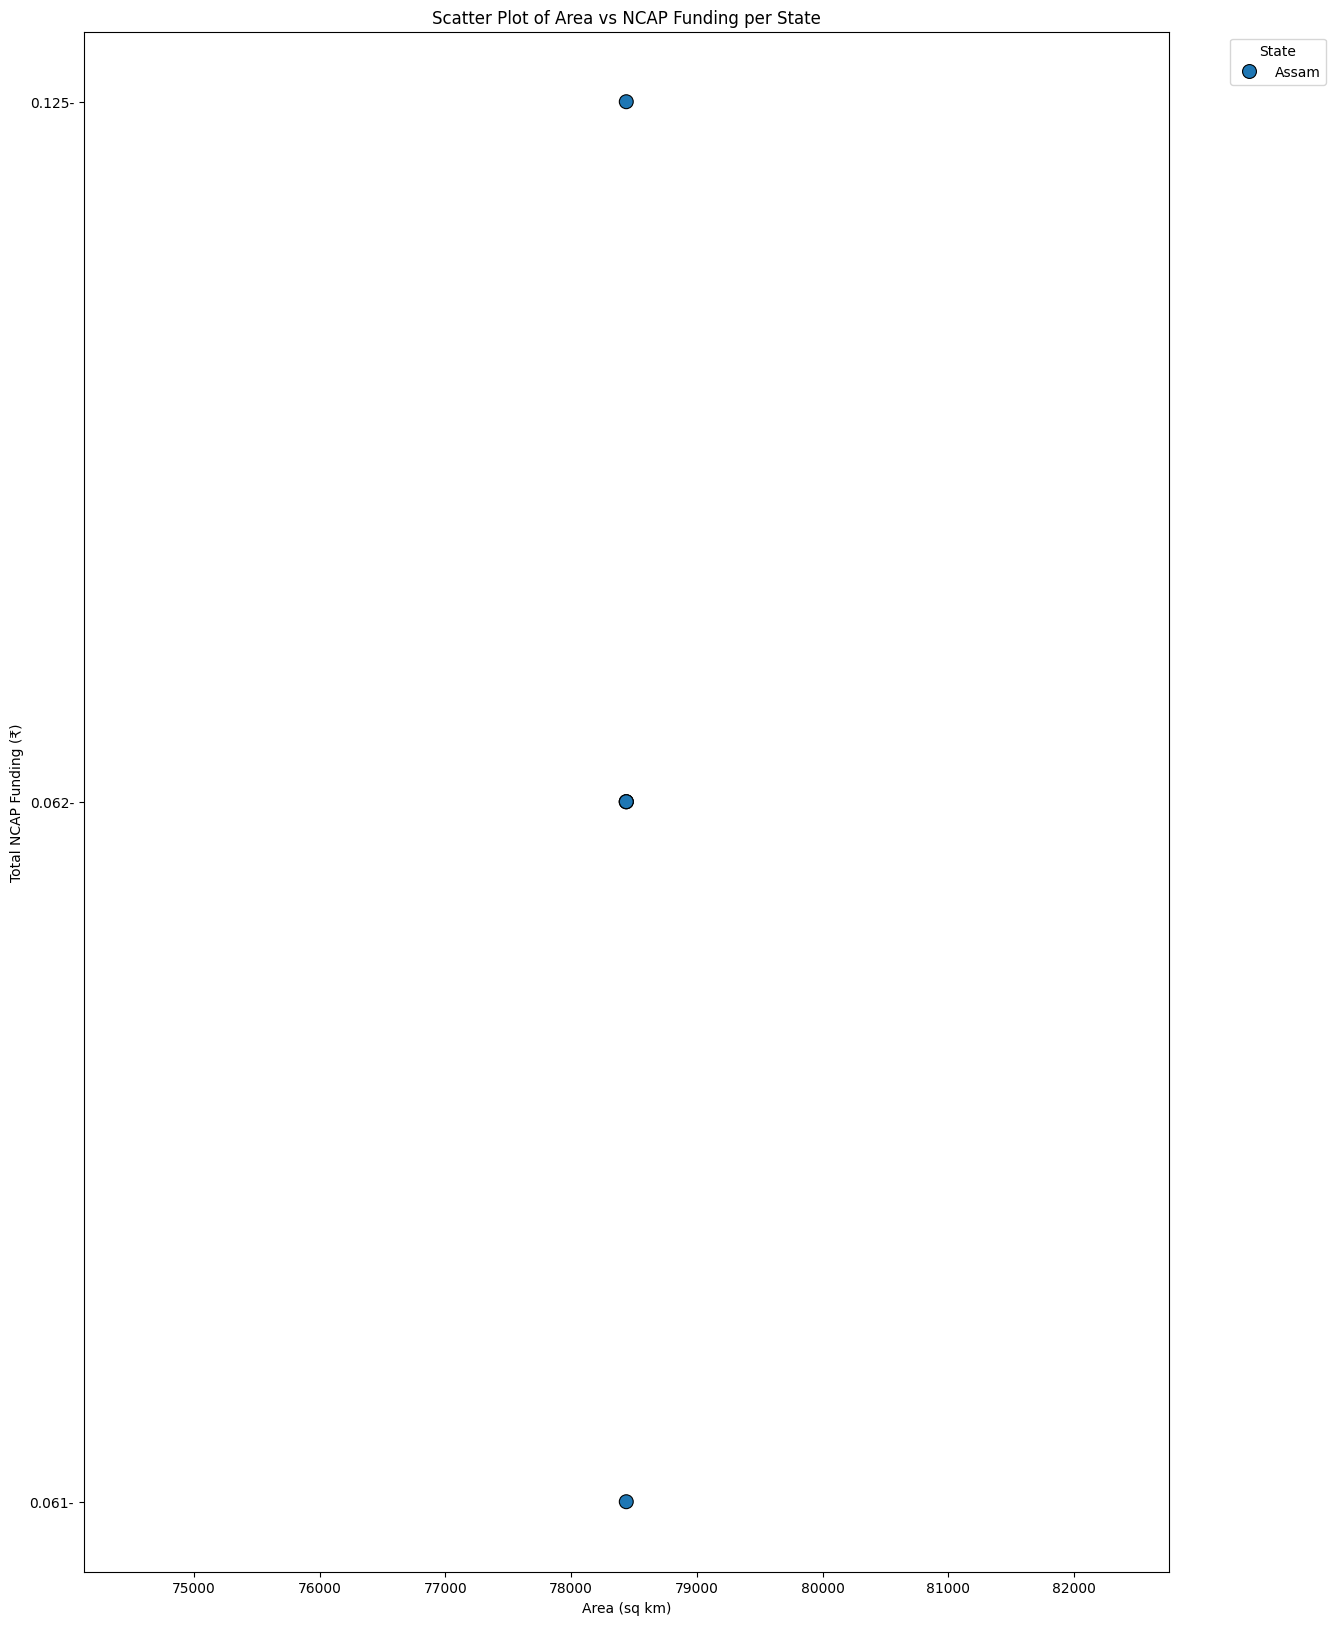

In [36]:
#6.3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



funding_columns = [col for col in ncap_funding_df.columns if 'FY' in col]
ncap_funding_df['Total_Funding'] = ncap_funding_df[funding_columns].sum(axis=1)
merged_df = pd.merge(ncap_funding_df[['State', 'Total_Funding']], state_data[['State', 'Area (km2)']], on='State')

plt.figure(figsize=(14, 20))
sns.scatterplot(data=merged_df, x='Area (km2)', y='Total_Funding', hue='State', palette='tab20', s=100, edgecolor='black')
plt.xlabel('Area (sq km)')
plt.ylabel('Total NCAP Funding (₹)')
plt.title('Scatter Plot of Area vs NCAP Funding per State')
plt.legend(title='State', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [ ]:
#7.1
import pandas as pd



data['Timestamp'] = pd.to_datetime(data['Timestamp'], errors='coerce')
data['Year'] = data['Timestamp'].dt.year
data_2023 = data[data['Year'] == 2023]

avg_pm25_by_city = data_2023.groupby('city')['PM2.5'].mean()
most_polluted_city = avg_pm25_by_city.idxmax()
print(f"Most Polluted City in 2023: {most_polluted_city}")

city_data = data_2023[data_2023['city'] == most_polluted_city]
total_days = city_data['Timestamp'].dt.date.nunique()
hazardous_days = city_data[city_data['PM2.5'] > 300]['Timestamp'].dt.date.nunique()
percentage_hazardous_days = (hazardous_days / total_days) * 100
print(f"Percentage of days with PM2.5 > 300 µg/m³ in {most_polluted_city} in 2023: {percentage_hazardous_days:.2f}%")


Most Polluted City in 2023: Darbhanga
Percentage of days with PM2.5 > 300 µg/m³ in Darbhanga in 2023: 0.82%


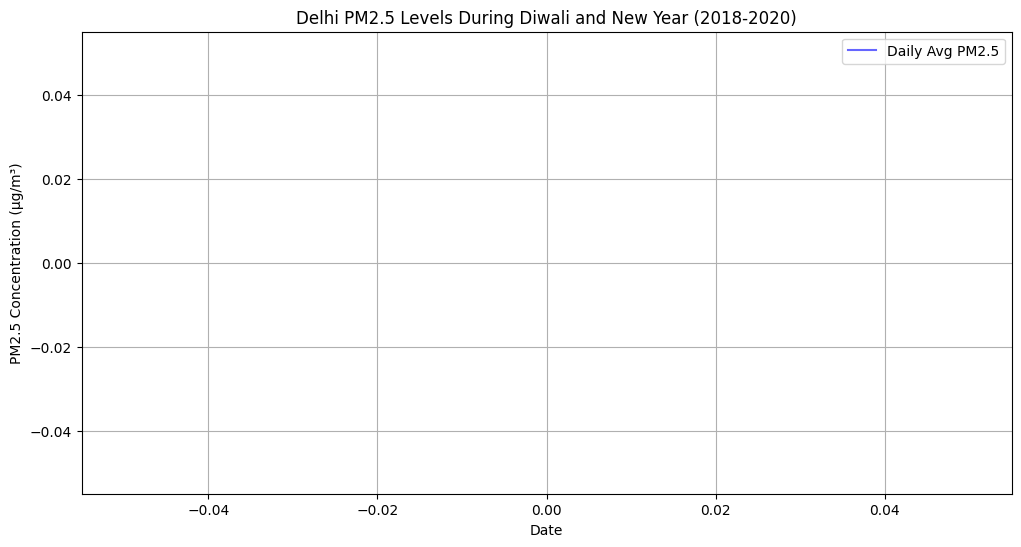

In [37]:
#7.2
import pandas as pd
import matplotlib.pyplot as plt


delhi_data = air_quality_df[(air_quality_df['city'] == 'Delhi') &
                            (air_quality_df['Timestamp'].dt.year.isin([2018, 2019, 2020]))].copy()

delhi_data['Year'] = delhi_data['Timestamp'].dt.year
delhi_data['Month'] = delhi_data['Timestamp'].dt.month
delhi_data['Date'] = delhi_data['Timestamp'].dt.date


daily_pm25 = delhi_data.groupby('Date', as_index=False)['PM2.5'].mean()
plt.figure(figsize=(12, 6))
plt.plot(daily_pm25['Date'], daily_pm25['PM2.5'], label='Daily Avg PM2.5', color='blue', alpha=0.6)

diwali_dates = daily_pm25[daily_pm25['Date'].astype(str).str.contains('-10-|-11-')].copy()
new_year_dates = daily_pm25[daily_pm25['Date'].astype(str).str.contains('-12-|-01-')].copy()

if not diwali_dates.empty:
    max_diwali_pm25 = diwali_dates.loc[diwali_dates['PM2.5'].idxmax()]
    plt.annotate('Diwali Spike',
                 xy=(max_diwali_pm25['Date'], max_diwali_pm25['PM2.5']),
                 xytext=(-40, 30), textcoords='offset points',
                 arrowprops=dict(arrowstyle='->', color='red'))

if not new_year_dates.empty:
    max_newyear_pm25 = new_year_dates.loc[new_year_dates['PM2.5'].idxmax()]
    plt.annotate('New Year Spike',
                 xy=(max_newyear_pm25['Date'], max_newyear_pm25['PM2.5']),
                 xytext=(-40, 30), textcoords='offset points',
                 arrowprops=dict(arrowstyle='->', color='red'))

plt.xlabel('Date')
plt.ylabel('PM2.5 Concentration (µg/m³)')
plt.title('Delhi PM2.5 Levels During Diwali and New Year (2018-2020)')
plt.legend()
plt.grid(True)
plt.show()

State with highest NCAP funding in 2020: Assam


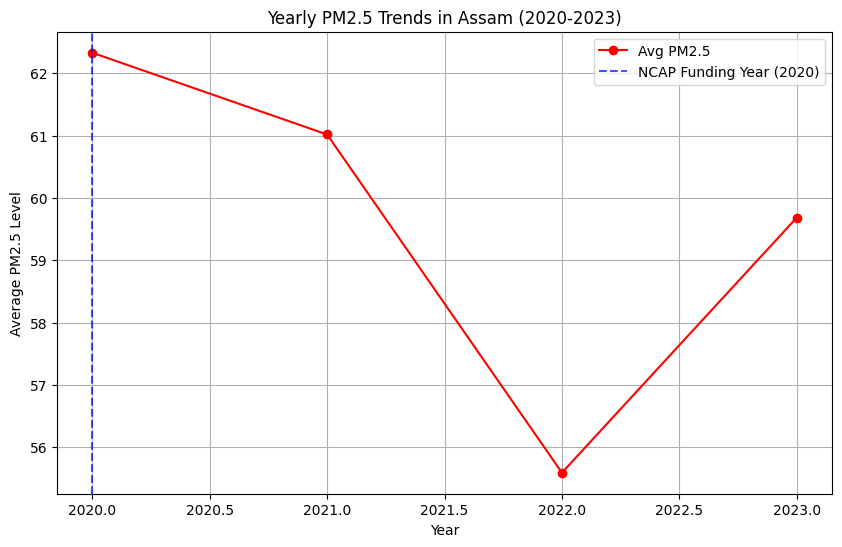

In [48]:
#7.3
import pandas as pd
import matplotlib.pyplot as plt




funding_2020 = ncap_funding_df[['State', 'Amount released during FY 2020-21']].dropna()
funding_2020 = funding_2020.rename(columns={'Amount released during FY 2020-21': 'Funding_2020'})

highest_funded_state = funding_2020.loc[funding_2020['Funding_2020'].idxmax(), 'State']
print(f"State with highest NCAP funding in 2020: {highest_funded_state}")

state_air_quality = air_quality_df[(air_quality_df['state'] == highest_funded_state) &
                                   (air_quality_df['Timestamp'].dt.year.isin([2020, 2021, 2022, 2023]))].copy()
state_air_quality['Year'] = state_air_quality['Timestamp'].dt.year
yearly_avg_pm25 = state_air_quality.groupby('Year')['PM2.5'].mean().reset_index()

plt.figure(figsize=(10, 6))
plt.plot(yearly_avg_pm25['Year'], yearly_avg_pm25['PM2.5'], marker='o', linestyle='-', color='red', label='Avg PM2.5')
plt.axvline(x=2020, color='blue', linestyle='--', alpha=0.7, label='NCAP Funding Year (2020)')
plt.xlabel('Year')
plt.ylabel('Average PM2.5 Level')
plt.title(f'Yearly PM2.5 Trends in {highest_funded_state} (2020-2023)')
plt.legend()
plt.grid(True)
plt.show()

In [49]:
#7.4
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

world = gpd.read_file(r"C":\Users\ok\Downloads\ne_10m_admin_0_countries)
india = world[world["ADMIN"] == "India"]
sensor_data = pd.read_csv("Data.csv")
if "latitude" in sensor_data.columns and "longitude" in sensor_data.columns:
    gdf_sensors = gpd.GeoDataFrame(
        sensor_data,
        geometry=gpd.points_from_xy(sensor_data.longitude, sensor_data.latitude),
        crs="EPSG:4326"
    )

    fig, ax = plt.subplots(figsize=(10, 12))
    india.plot(ax=ax, color="lightgray", edgecolor="black")
    gdf_sensors.plot(ax=ax, color="red", markersize=5, alpha=0.7, label="Sensor Locations")

    plt.title("Sensor Locations Across India")
    plt.legend()
    plt.show()
else:
    print("Latitude and Longitude columns not found in Data.csv")

DataSourceError: C:\Users\ok\Downloads\ne_10m_admin_0_countries: No such file or directory

The below graph is the PM2.5 values for top 10 major cities during week days and weekends


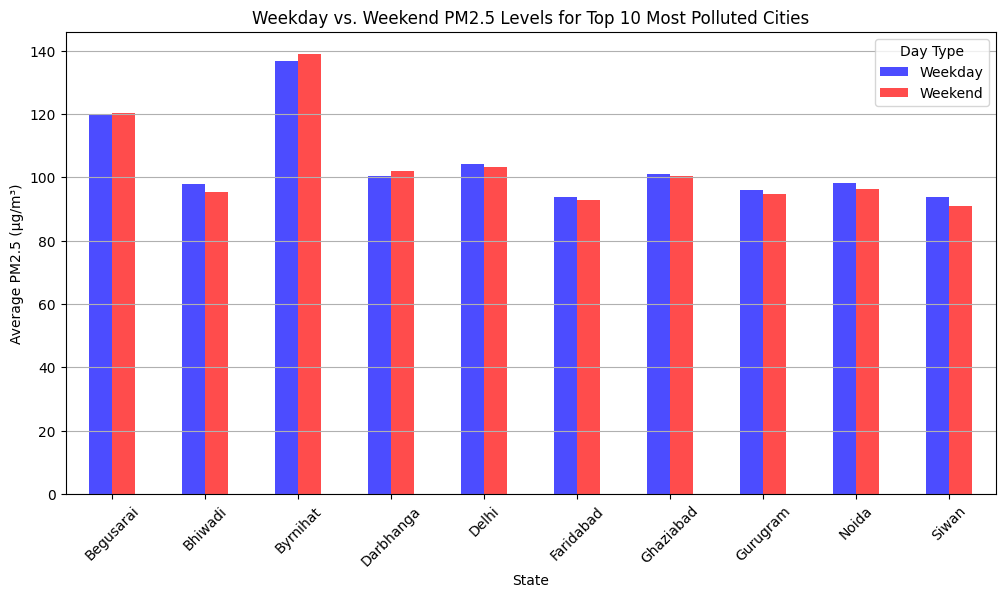

Cities with Higher Weekend Pollution (e.g., Begusarai, Buxar, Darbhanga, Delhi)
 this could be because of higher traffic due to tourism
Cities with Lower Weekend Pollution (e.g., Bhiwadi, Faridabad, Siwan, Gurugram)
 this could be beacuse of slowdown of factories on weekends
Takeaways to policy makers:
 For those where there is weekday drop of the pollution it is better to take measures about tourism traffic 
 For cities with weekend drop of pollution they should implement strict measures against factories


In [47]:
#8
import pandas as pd
import matplotlib.pyplot as plt
print("The below graph is the PM2.5 values for top 10 major cities during week days and weekends")

air_quality_df = pd.read_csv("Data.csv", parse_dates=['Timestamp'])

air_quality_df['Day'] = air_quality_df['Timestamp'].dt.dayofweek
air_quality_df['Day Type'] = air_quality_df['Day'].apply(lambda x: 'Weekend' if x >= 5 else 'Weekday')
state_avg_pm25 = air_quality_df.groupby('city')['PM2.5'].mean().reset_index()
top_10_states = state_avg_pm25.nlargest(10, 'PM2.5')['city']
filtered_data = air_quality_df[air_quality_df['city'].isin(top_10_states)]
statewise_pm25 = filtered_data.groupby(['city', 'Day Type'])['PM2.5'].mean().reset_index()
statewise_pm25_pivot = statewise_pm25.pivot(index='city', columns='Day Type', values='PM2.5')
statewise_pm25_pivot.plot(kind='bar', figsize=(12, 6), color=['blue', 'red'], alpha=0.7)

plt.xlabel('State')
plt.ylabel('Average PM2.5 (µg/m³)')
plt.title('Weekday vs. Weekend PM2.5 Levels for Top 10 Most Polluted Cities')
plt.xticks(rotation=45)
plt.legend(title="Day Type")
plt.grid(axis='y')
plt.show()
print("Cities with Higher Weekend Pollution (e.g., Begusarai, Buxar, Darbhanga, Delhi)\n this could be because of higher traffic due to tourism")
print("Cities with Lower Weekend Pollution (e.g., Bhiwadi, Faridabad, Siwan, Gurugram)\n this could be beacuse of slowdown of factories on weekends")
print("Takeaways to policy makers:\n For those where there is weekday drop of the pollution it is better to take measures about tourism traffic ")
print(" For cities with weekend drop of pollution they should implement strict measures against factories")